In [1]:
# ms-python.python added
import os

try:
    os.chdir(os.path.join(os.getcwd(), "notebooks"))
    print(os.getcwd())
except:
    pass

/mnt/home2/clee/code/eegml/eeg-hdfstorage/notebooks


In [2]:
from IPython import get_ipython


 ## Introduction to visualizing data in the eeghdf files

 ### Getting started
 The EEG is stored in hierachical data format (HDF5). This format is widely used, open, and supported in many languages, e.g., matlab, R, python, C, etc.

 Here, I will use the eeghdf library in python for more convenient access than using raw h5py

In [1]:
# import libraries
from __future__ import print_function, division, unicode_literals

get_ipython().run_line_magic("matplotlib", "inline")
# %matplotlib notebook # allows interactions

import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import eeghdf
from pprint import pprint

import stacklineplot  # local copy of eegvis.stacklineplot



In [2]:
# Make all the figures bigger and easier to see in this notebook
# matplotlib.rcParams['figure.figsize'] = (18.0, 12.0)
FIGSIZE = (12.0, 8.0)  # use with %matplotlib inline
matplotlib.rcParams["figure.figsize"] = FIGSIZE


 ### Access via eeghdf library
 We have written a helper library eeghdf to conveniently access these hdf5 files.
 Note but you are not required to use this as you can access all the data via hdf5 libraries.

In [3]:
# first open the hdf5 file
eegf = eeghdf.Eeghdf("../data/absence_epilepsy.eeghdf")

# show the groups at the root of the tree as a list


 We can focus on the patient group and access it via hdf['patient'] as if it was a python dictionary. Here are the key,value pairs in that group. Note that the patient information has been anonymized. Everyone is given the same set of birthdays. This shows that this file is for Subject 2619, who is male.

In [4]:
# here is some basic info
print(f"eegf.file_name: {eegf.file_name}")
print(f"eegf.age_years: {eegf.age_years}")

print(f"eegf.number_channels: {eegf.number_channels}")
print(f"sample_frquency: {eegf.sample_frequency}")
print(f"eegf.patient: {eegf.patient}")
print(f"eegf.start_isodatetime: {eegf.start_isodatetime}")
print(f"eegf.end_isodatetime: {eegf.end_isodatetime}")

eegf.file_name: ../data/absence_epilepsy.eeghdf
eegf.age_years: 10.05033631405378
eegf.number_channels: 36
sample_frquency: 200.00000000000003
eegf.patient: {'patient_name': '2619, Subject', 'patientcode': '3fe61c07d97e5b5595d647f9c1dc469e', 'gender': 'Male', 'birthdate': '1990-01-01', 'patient_additional': '', 'gestatational_age_at_birth_days': -1.0, 'born_premature': 'unknown'}
eegf.start_isodatetime: 2000-01-17 08:56:46
eegf.end_isodatetime: 2000-01-17 09:26:57


In [6]:
# can get this list of electrode labels
print(f"eegf.electrode_labels: \n\n{eegf.electrode_labels}")

eegf.electrode_labels: 

['EEG Fp1', 'EEG Fp2', 'EEG F3', 'EEG F4', 'EEG C3', 'EEG C4', 'EEG P3', 'EEG P4', 'EEG O1', 'EEG O2', 'EEG F7', 'EEG F8', 'EEG T3', 'EEG T4', 'EEG T5', 'EEG T6', 'EEG Fz', 'EEG Cz', 'EEG Pz', 'E', 'EEG Pg1', 'EEG Pg2', 'EEG A1', 'EEG A2', 'EEG FT9', 'EEG FT10', 'ECG X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'EEG Mark1', 'EEG Mark2', 'Events/Markers']


In [7]:
# the underlying hdf5 file handle (from h5py) is available at
eegf.hdf


<HDF5 file "absence_epilepsy.eeghdf" (mode r)>

#### Now we look at how the waveform data is accessed. 
 It can be accessed as the sampled numbers by using eegf.rawsignals[ch,sample]
 (usually int16 or int32)

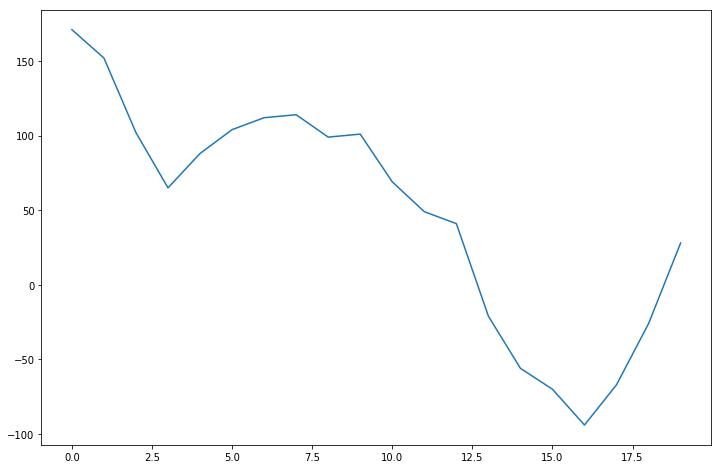

In [8]:
eegf.rawsignals[
    4, 2000:2020
]  # get channel 4, samples 2000 to 2020 (remember start counting at zero)
plt.plot(eegf.rawsignals[4, 2000:2020])


 often you will instead want the signals converted/scaled into physically meaniful units. For EEG this will usually
 be micro volts (uV) or possibly mV

In [11]:
print(f"the unit for channel 4 is {eegf.physical_dimensions[4]}")
eegf.phys_signals[4, 2000:2020]


the unit for channel 4 is uV


array([16.69921785, 14.8437492 ,  9.96093696,  6.34765591,  8.59374954,
       10.15624945, 10.93749941, 11.1328119 ,  9.66796823,  9.86328072,
        6.73828089,  4.78515599,  4.00390603, -2.05078114, -5.46874971,
       -6.83593713, -9.17968701, -6.5429684 , -2.53906236,  2.73437485])

Text(0.5, 0, 'sec')

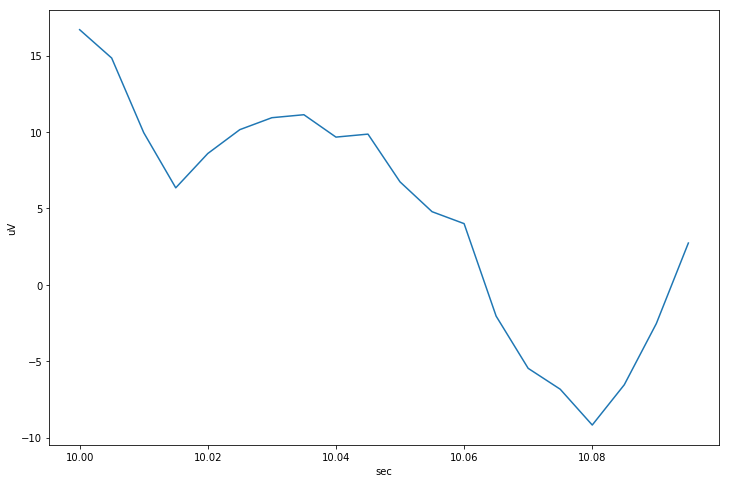

In [12]:
t = np.arange(2000 / 200, 2020 / 200, step=1 / 200)
plt.plot(t, eegf.phys_signals[4, 2000:2020])
plt.ylabel(eegf.physical_dimensions[4])
plt.xlabel("sec")

 We can also grab the actual waveform data and visualize it. Using the helper library for matplotlib stackplot.py.


 [More work is being done in the eegml eegvis package for more sophisticated visualization.]

In [13]:
electrode_labels = eegf.shortcut_elabels # these are nicer to use for plotting

 #### Simple visualization of EEG (brief absence seizure)

Text(0.5, 1.0, 'Absence Seizure')

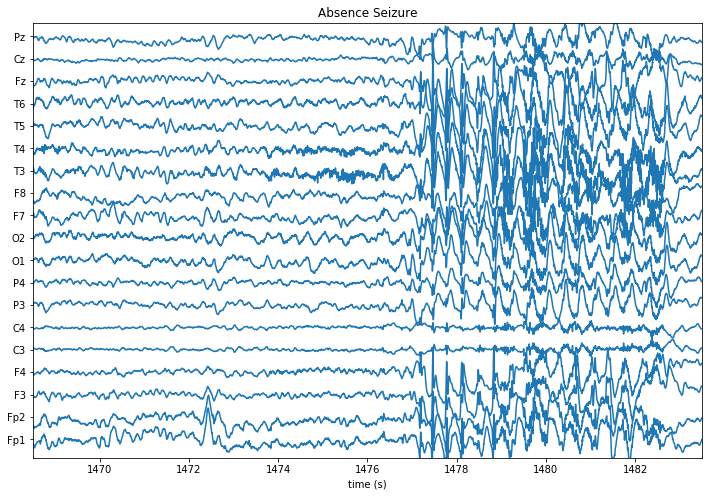

In [14]:
# choose a point in the waveform to show a seizure
stacklineplot.show_epoch_centered(
    eegf.phys_signals,
    1476,
    epoch_width_sec=15,
    chstart=0,
    chstop=19,
    fs=eegf.sample_frequency,
    ylabels=eegf.shortcut_elabels,
    yscale=3.0,
)
plt.title("Absence Seizure")


 ### Annotations
 It was not a coincidence that I chose this time in the record. I used the annotations to focus on portion of the record which was marked as having a seizure.

 You can access the clinical annotations.
 If you need them, you can get the raw list using 
 ```
 eegf._annotation_text  and  eegf._annotation_start100ns
 ```
 They are originally stored with integer start times counting in unitsl of 100ns from the beginning of the file

In [15]:
# here is a sample
list(zip(eegf._annotation_text, eegf._annotation_start100ns))[:10]



[('REC START Biocal CAL', 0),
 ('A1+A2 OFF', 13900000),
 ('PAT Biocal EEG', 58500000),
 ('PAT A_DB EEG', 117500000),
 ('IMP CHECK ON', 317800000),
 ('IMP CHECK OFF', 348400000),
 ('vertex-waves', 396490000),
 ('sleeping on back', 448080000),
 ('head straight up', 491140000),
 ('head on neckroll', 529980000)]

 But usually, I have accessed them by requesting them as a dataframe

In [16]:
eegf.edf_annotations_df


,text,starts_sec,starts_100ns
0,REC START Biocal CAL,0.000,0
1,A1+A2 OFF,1.390,13900000
2,PAT Biocal EEG,5.850,58500000
3,PAT A_DB EEG,11.750,117500000
4,IMP CHECK ON,31.780,317800000
5,IMP CHECK OFF,34.840,348400000
6,vertex-waves,39.649,396490000
7,sleeping on back,44.808,448080000
8,head straight up,49.114,491140000
9,head on neckroll,52.998,529980000


 It is easy then to find the annotations related to seizures

In [17]:
eegf.annotations_contain("sz", case=False)



,text,starts_sec,starts_100ns
86,SZ START,1380.512,13805120000
88,SZ END,1384.246,13842460000
91,SZ START,1416.897,14168970000
93,SZ END,1422.843,14228430000
99,SZ START,1476.933,14769330000
103,SZ END,1483.269,14832690000


In [18]:
print("matplotlib.__version__:", matplotlib.__version__)
print("eeghdf.__version__", eeghdf.__version__)
print("pandas.__version__:", pd.__version__)



matplotlib.__version__: 3.0.2
eeghdf.__version__ 0.0.4
pandas.__version__: 0.23.4
